In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objects as go

In [2]:
df=pd.read_csv('loan.csv')

C:\Users\kosta\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(2260668, 145)

In [5]:
df=df.dropna(axis=1,how='all')
#remove totally empty columns - id, member_id, loan_amnt'

In [6]:
for col in sorted(df.columns):
    print(col)
    #full printout of columns for reference

acc_now_delinq
acc_open_past_24mths
addr_state
all_util
annual_inc
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collection_recovery_fee
collections_12_mths_ex_med
debt_settlement_flag
debt_settlement_flag_date
deferral_term
delinq_2yrs
delinq_amnt
desc
disbursement_method
dti
dti_joint
earliest_cr_line
emp_length
emp_title
funded_amnt
funded_amnt_inv
grade
hardship_amount
hardship_dpd
hardship_end_date
hardship_flag
hardship_last_payment_amount
hardship_length
hardship_loan_status
hardship_payoff_balance_amount
hardship_reason
hardship_start_date
hardship_status
hardship_type
home_ownership
il_util
initial_list_status
inq_fi
inq_last_12m
inq_last_6mths
installment
int_rate
issue_d
last_credit_pull_d
last_pymnt_amnt
last_pymnt_d
loan_amnt
loan_status
max_bal_bc
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
m

In [7]:
lcdloanstats=pd.read_excel('LCDataDictionary.xlsx','LoanStats')
#column descriptions from reference document

In [8]:
lcdloanstats

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [9]:
lcdloanstats['LoanStatNew']=lcdloanstats['LoanStatNew'].str.strip()

In [10]:
lcdloanstats=lcdloanstats.loc[lcdloanstats['LoanStatNew'].isin(df.columns)]

In [11]:
lcdloanstats
#extra items removed from column description

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [12]:
lcdloanstats.loc[lcdloanstats['LoanStatNew'].str.contains('funded')]

,LoanStatNew,Description
23,funded_amnt,The total amount committed to that loan at tha...
24,funded_amnt_inv,The total amount committed by investors for th...


consider all loans as funded - drop 'funded_amnt' and 'funded_amnt_inv' use just loan amount

In [13]:
(df.loc[df.funded_amnt!=df.funded_amnt_inv]['funded_amnt'].astype(int)-df.loc[df.funded_amnt!=df.funded_amnt_inv]['funded_amnt_inv'].astype(int)).describe()


count    151112.00000
mean        272.69921
std        1263.13647
min           1.00000
25%          25.00000
50%          50.00000
75%         175.00000
max       32475.00000
dtype: float64

In [14]:
(df['funded_amnt']-df['funded_amnt_inv']).describe()

count    2.260668e+06
mean     1.822643e+01
std      3.335880e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.247500e+04
dtype: float64

In [15]:
df.loc[df.funded_amnt!=df.funded_amnt_inv]['issue_d'].value_counts()

Jul-2015    5731
Mar-2016    5061
Aug-2015    4266
Dec-2017    3901
Oct-2015    3886
Sep-2015    3648
Nov-2015    3500
May-2014    3073
Dec-2015    3016
Nov-2016    2953
Jan-2014    2613
Dec-2016    2546
Jan-2018    2416
Feb-2014    2204
Aug-2013    2098
Feb-2013    2063
Apr-2014    1899
Mar-2013    1869
Dec-2013    1830
Mar-2015    1768
Oct-2013    1755
Nov-2013    1742
Sep-2013    1710
Mar-2014    1675
Apr-2016    1667
Jan-2013    1552
Jun-2015    1444
Jul-2013    1439
Feb-2016    1407
Oct-2014    1368
            ... 
Mar-2010     431
Mar-2008     386
Sep-2009     371
Aug-2009     356
Oct-2009     350
Jun-2009     313
Jul-2009     308
Jan-2008     301
Feb-2008     299
May-2009     298
Apr-2009     294
Feb-2009     283
Jan-2009     260
Mar-2009     254
Apr-2008     250
Dec-2008     248
Nov-2008     206
Dec-2007     172
Jul-2008     141
Jun-2008     124
Oct-2008     122
May-2008     115
Nov-2007     112
Oct-2007     105
Aug-2008     100
Aug-2007      73
Jul-2007      62
Sep-2008      

In [16]:
df.policy_code.describe()

count    2260668.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: policy_code, dtype: float64

In [17]:
for i in ['title','desc','policy_code','funded_amnt_inv','funded_amnt']:
    print(i,lcdloanstats.loc[lcdloanstats['LoanStatNew']==i]['Description'])
    print('\n\n')

title 95    The loan title provided by the borrower
Name: Description, dtype: object



desc 15    Loan description provided by the borrower
Name: Description, dtype: object



policy_code 84    publicly available policy_code=1\nnew products...
Name: Description, dtype: object



funded_amnt_inv 24    The total amount committed by investors for th...
Name: Description, dtype: object



funded_amnt 23    The total amount committed to that loan at tha...
Name: Description, dtype: object





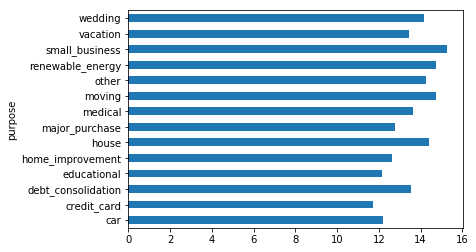

In [18]:
df.groupby('purpose')['int_rate'].mean().plot.barh()

In [19]:
for col in df.columns:
    if df[col].nunique()<3:
        print(col,df[col].nunique(),'\n',lcdloanstats.loc[lcdloanstats['LoanStatNew']==col]['Description'].iloc[0],'\n',df[col].value_counts(),'\n\n\n\n')



term 2 
 The number of payments on the loan. Values are in months and can be either 36 or 60. 
  36 months    1609754
 60 months     650914
Name: term, dtype: int64 




pymnt_plan 2 
 Indicates if a payment plan has been put in place for the loan 
 n    2259986
y        682
Name: pymnt_plan, dtype: int64 




initial_list_status 2 
 The initial listing status of the loan. Possible values are – W, F 
 w    1535467
f     725201
Name: initial_list_status, dtype: int64 




policy_code 1 
 publicly available policy_code=1
new products not publicly available policy_code=2 
 1    2260668
Name: policy_code, dtype: int64 




application_type 2 
 Indicates whether the loan is an individual application or a joint application with two co-borrowers 
 Individual    2139958
Joint App      120710
Name: application_type, dtype: int64 




hardship_flag 2 
 Flags whether or not the borrower is on a hardship plan 
 N    2259783
Y        885
Name: hardship_flag, dtype: int64 




hardship_type 1 
 Desc

'policy' and 'initial_list_status' are ambiguous in its meaning and will be dropped
'title' and 'desc' are redundant after the better curated and 'purpose'.


'funded_amnt' and 'funded_amnt_inv' can be dropped and use only 'loan_amnt'


In [20]:
#keep 'purpose' - drop 'title', 'desc', 'policy'
df=df.drop(columns=['title','desc','policy_code','funded_amnt_inv','funded_amnt'])

In [21]:
for col in df.columns:
    if 'hardship' in col:
        print(col,df[col].notna().sum())

hardship_flag 2260668
hardship_type 10613
hardship_reason 10613
hardship_status 10613
hardship_amount 10613
hardship_start_date 10613
hardship_end_date 10613
hardship_length 10613
hardship_dpd 10613
hardship_loan_status 10613
hardship_payoff_balance_amount 10613
hardship_last_payment_amount 10613


'hardship_flag' contains 774 "Y"s whereas all the other hardship related columns contain 10087 valid entries. I conclude that 'hardship_flag' has been improperly filled out and can be dropped as it does not appropriately describe the loans that have hardship.

'hardship_length', 'hardship_type' and 'deferral_term; all have only one valid entry (3 month interest only payments) and can be used as a hardship flag by proxy and reduced to a single column - we shall keep 'hardship_length'

In [22]:
df=df.drop(columns=['hardship_flag','deferral_term','hardship_type'])

In [23]:
df.dtypes.loc[df.dtypes=='object']

term                         object
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                   object
purpose                      object
zip_code                     object
addr_state                   object
earliest_cr_line             object
initial_list_status          object
last_pymnt_d                 object
next_pymnt_d                 object
last_credit_pull_d           object
application_type             object
verification_status_joint    object
sec_app_earliest_cr_line     object
hardship_reason              object
hardship_status              object
hardship_start_date          object
hardship_end_date            object
payment_plan_start_date      object
hardship_loan_status         object
disbursement_method         

Set date columns to pandas datetime

In [24]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d']=pd.to_datetime(df['next_pymnt_d'])

In [25]:
df.issue_d.min()

Timestamp('2007-06-01 00:00:00')

In [26]:
df.issue_d.max()

Timestamp('2018-12-01 00:00:00')

In [27]:
df['last_pymnt_d'].max()

Timestamp('2019-02-01 00:00:00')

In [28]:
df['term'].value_counts()

 36 months    1609754
 60 months     650914
Name: term, dtype: int64

Map term month lengths to integers instead of strings

In [29]:
df['term']=df['term'].str.strip().map({'36 months':36,'60 months':60})

In [30]:
#columns with no NaNs
df.dropna(axis='columns').columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'revol_bal',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'application_type', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')

In [31]:
df.dropna(axis='columns').describe()

,loan_amnt,term,int_rate,installment,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,4.291032e+01,1.309291e+01,4.458076e+02,1.665846e+04,4.446293e+03,4.445295e+03,1.182403e+04,1.180594e+04,9.300142e+03,2.386352e+03,1.462469e+00,1.360740e+02,2.259328e+01,3.364015e+03
std,9.190245e+03,1.086716e+01,4.832114e+00,2.671737e+02,2.294831e+04,7.547612e+03,7.546657e+03,9.889599e+03,9.884835e+03,8.304886e+03,2.663086e+03,1.150210e+01,7.258317e+02,1.271114e+02,5.971757e+03
min,5.000000e+02,3.600000e+01,5.310000e+00,4.930000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.500000e-09,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,3.600000e+01,9.490000e+00,2.516500e+02,5.950000e+03,0.000000e+00,0.000000e+00,4.272580e+03,4.257730e+03,2.846180e+03,6.936100e+02,0.000000e+00,0.000000e+00,0.000000e+00,3.086400e+02
50%,1.290000e+04,3.600000e+01,1.262000e+01,3.779900e+02,1.132400e+04,0.000000e+00,0.000000e+00,9.060870e+03,9.043080e+03,6.823385e+03,1.485280e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.884700e+02
75%,2.000000e+04,6.000000e+01,1.599000e+01,5.933200e+02,2.024600e+04,6.712632e+03,6.710320e+03,1.670797e+04,1.668257e+04,1.339750e+04,3.052220e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.534965e+03
max,4.000000e+04,6.000000e+01,3.099000e+01,1.719830e+03,2.904836e+06,4.000000e+04,4.000000e+04,6.329688e+04,6.329688e+04,4.000000e+04,2.819250e+04,1.427250e+03,3.985955e+04,7.174719e+03,4.219205e+04


In [32]:
#drop policy code - always 1

In [33]:
df.application_type.value_counts(normalize=True)
#drop joint apps for simplicity - cut columns too

Individual    0.946604
Joint App     0.053396
Name: application_type, dtype: float64

Consider only loans granted to indivdual applicants for simplicity. These are by far the larger portion at almost 95% of all loans.<br>
this eliminates several columns that only relate to joint applications

In [34]:
df=df.loc[df['application_type']=='Individual']
df=df.drop(columns=['application_type'])
df=df.dropna(axis=1,how='all')

In [35]:
df.dtypes

loan_amnt                                              int64
term                                                   int64
int_rate                                             float64
installment                                          float64
grade                                                 object
sub_grade                                             object
emp_title                                             object
emp_length                                            object
home_ownership                                        object
annual_inc                                           float64
verification_status                                   object
issue_d                                       datetime64[ns]
loan_status                                           object
pymnt_plan                                            object
purpose                                               object
zip_code                                              object
addr_state              

In [36]:
for col in df.columns:
    print(col, df[col].nunique())

loan_amnt 1572
term 2
int_rate 673
installment 91360
grade 7
sub_grade 35
emp_title 496895
emp_length 11
home_ownership 6
annual_inc 85803
verification_status 3
issue_d 139
loan_status 9
pymnt_plan 2
purpose 14
zip_code 955
addr_state 51
dti 4881
delinq_2yrs 37
earliest_cr_line 753
inq_last_6mths 28
mths_since_last_delinq 172
mths_since_last_record 129
open_acc 91
pub_rec 43
revol_bal 100368
revol_util 1426
total_acc 152
initial_list_status 2
out_prncp 336320
out_prncp_inv 348176
total_pymnt 1560066
total_pymnt_inv 1262687
total_rec_prncp 466539
total_rec_int 618861
total_rec_late_fee 17606
recoveries 126349
collection_recovery_fee 138617
last_pymnt_d 135
last_pymnt_amnt 679100
next_pymnt_d 105
last_credit_pull_d 140
collections_12_mths_ex_med 16
mths_since_last_major_derog 182
acc_now_delinq 9
tot_coll_amt 15383
tot_cur_bal 475748
open_acc_6m 19
open_act_il 54
open_il_12m 19
open_il_24m 31
mths_since_rcnt_il 403
total_bal_il 157306
il_util 277
open_rv_12m 29
open_rv_24m 50
max_bal_bc 

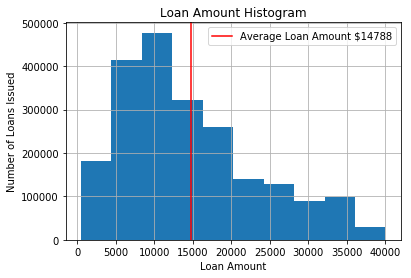

In [37]:
df['loan_amnt'].hist()
plt.title('Loan Amount Histogram')
plt.xlabel('Loan Amount')
plt.ylabel('Number of Loans Issued')
plt.axvline(df['loan_amnt'].mean(),label='Average Loan Amount $'+str(round(df['loan_amnt'].mean())),color='r')
plt.legend()
plt.show()


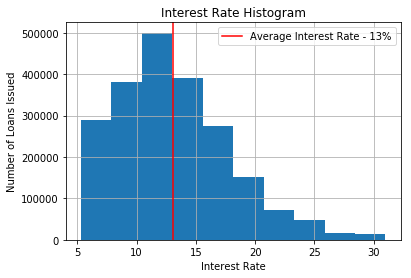

In [38]:
df['int_rate'].hist()
plt.title('Interest Rate Histogram')
plt.xlabel('Interest Rate')
plt.ylabel('Number of Loans Issued')
plt.axvline(df['int_rate'].mean(),label='Average Interest Rate - '+str(round(df['int_rate'].mean()))+'%',color='r')
plt.legend()
plt.show()

In [39]:
df.loan_status.value_counts(normalize=True)

Fully Paid                                             0.478722
Current                                                0.385949
Charged Off                                            0.119594
Late (31-120 days)                                     0.009213
In Grace Period                                        0.003674
Late (16-30 days)                                      0.001553
Does not meet the credit policy. Status:Fully Paid     0.000929
Does not meet the credit policy. Status:Charged Off    0.000356
Default                                                0.000011
Name: loan_status, dtype: float64

In [40]:
df.loan_status.value_counts()

Fully Paid                                             1024444
Current                                                 825914
Charged Off                                             255926
Late (31-120 days)                                       19716
In Grace Period                                           7862
Late (16-30 days)                                         3323
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     24
Name: loan_status, dtype: int64

In [41]:
(df.loc[df['loan_status']=='Charged Off']['loan_amnt']-df.loc[df['loan_status']=='Charged Off']['total_pymnt']).describe()

count    255926.000000
mean       7196.029393
std        6610.545111
min      -26947.529797
25%        2473.317500
50%        5762.655000
75%       10521.332500
max       40000.000000
dtype: float64

In [42]:
((df.loc[df['loan_status']=='Charged Off']['loan_amnt']-df.loc[df['loan_status']=='Charged Off']['total_pymnt'])/df.loc[df['loan_status']=='Charged Off']['loan_amnt']).describe()

count    255926.000000
mean          0.457517
std           0.279865
min          -1.170300
25%           0.265315
50%           0.491998
75%           0.674175
max           1.000000
dtype: float64

In [43]:
df.loc[df['loan_status']=='Charged Off'][['loan_amnt','int_rate','total_pymnt','recoveries']]

,loan_amnt,int_rate,total_pymnt,recoveries
5040,8000,6.46,0.00,0.00
25963,6000,14.47,0.00,0.00
41393,10000,8.81,0.00,0.00
55148,10000,27.27,284.25,0.00
58105,35000,16.14,0.00,0.00
60604,4800,16.91,161.90,0.00
62536,35000,14.47,1147.96,0.00
64081,15000,11.31,0.00,0.00
67928,16000,10.08,481.63,0.00
68761,25000,6.46,756.80,0.00


In [44]:
df.loc[(df['loan_status']=='Charged Off')&(df['loan_amnt']<df['total_pymnt'])][['loan_amnt','term','installment','int_rate','total_pymnt']]

,loan_amnt,term,installment,int_rate,total_pymnt
279776,20000,36,717.75,17.47,21732.420000
326463,30000,60,785.17,19.42,31490.780000
376843,12000,36,457.36,21.85,12612.780000
378205,3000,36,92.24,6.71,3083.870000
387120,32000,60,670.97,9.43,32268.580000
390479,10000,36,339.74,13.58,10631.900000
391846,5000,36,179.44,17.47,5579.550000
411566,25000,60,667.79,20.39,26218.800000
423465,1000,36,36.87,19.42,1122.410000
442448,1000,36,36.19,18.06,1090.250000


In [45]:
sorted((df.loc[df['loan_status']=='Charged Off']['term']*df.loc[df['loan_status']=='Charged Off']['installment'])-df.loc[df['loan_status']=='Charged Off']['total_pymnt'])
#small portion of the loans had larger eventual payment amount than expected amount

[-12630.609999999999,
 -8991.720000000001,
 -2563.7700000000004,
 -2209.8499999999985,
 -1688.9400000000005,
 -1040.88,
 -886.0899999999983,
 -730.4199999999983,
 -697.5999999999985,
 -682.2300000000032,
 -640.5499999999993,
 -624.4999999999927,
 -560.7899999999972,
 -550.0500000000029,
 -533.079999999969,
 -516.8699765991041,
 -504.53999999999996,
 -483.22999999999774,
 -473.75,
 -455.3400000000038,
 -414.88000000000466,
 -413.08003533030205,
 -405.8600000000006,
 -382.34999999999854,
 -370.26000000000204,
 -365.5699999999997,
 -337.21000000000276,
 -321.630000000001,
 -314.20999999996,
 -311.5600000000013,
 -303.5698577616058,
 -295.64000000000124,
 -293.0499999999993,
 -289.34000000000015,
 -288.5699999999997,
 -283.9399999999987,
 -281.71999999999935,
 -279.5799999999981,
 -279.10999999999876,
 -275.34999999999854,
 -267.6200000000008,
 -267.179999999993,
 -260.97999999999956,
 -259.5,
 -256.40999999999985,
 -254.44999999999982,
 -252.5599999999995,
 -247.27999999999884,
 -246.8999

In [46]:
((df.loc[df['loan_status']=='Fully Paid']['term']*df.loc[df['loan_status']=='Fully Paid']['installment'])-df.loc[df['loan_status']=='Fully Paid']['total_pymnt']).describe()

count    1.024444e+06
mean     1.486053e+03
std      2.747715e+03
min     -3.182150e+04
25%      2.995394e+01
50%      4.464000e+02
75%      1.552692e+03
max      3.797197e+04
dtype: float64

In [47]:
df.loc[df['loan_status']=='Fully Paid'][['loan_amnt','issue_d','term','installment','int_rate','last_pymnt_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv']]

,loan_amnt,issue_d,term,installment,int_rate,last_pymnt_amnt,last_pymnt_d,total_pymnt,total_pymnt_inv
186,4500,2018-12-01,36,147.99,11.31,4553.46,2019-02-01,4549.217149,4549.22
269,20000,2018-12-01,60,507.55,17.97,20043.53,2019-01-01,20013.577333,20013.58
271,6600,2018-12-01,36,217.05,11.31,6629.03,2019-01-01,6622.809000,6346.86
296,2500,2018-12-01,36,84.92,13.56,2504.11,2019-01-01,2501.285667,2476.27
369,4000,2018-12-01,36,144.55,17.97,55.91,2019-02-01,4049.916667,4049.92
379,2700,2018-12-01,36,84.85,8.19,2702.68,2019-01-01,2700.838130,2675.83
402,1000,2018-12-01,36,38.92,23.40,1024.60,2019-02-01,1022.649016,1022.65
412,15000,2018-12-01,36,467.01,7.56,15072.45,2019-01-01,15063.000000,15063.00
445,8000,2018-12-01,36,249.08,7.56,8058.59,2019-02-01,8053.551386,8053.55
510,5000,2018-12-01,36,155.67,7.56,5016.80,2019-01-01,5013.650000,5013.65


In [48]:
df_complete=df.loc[(df['loan_status']=='Fully Paid') | (df['loan_status']=='Charged Off')].dropna(axis=1,how='all')

Expected return as installment multiplied by loan length

In [49]:
df_complete['expected_return']=df_complete['term']*df_complete['installment']

In [50]:
(df_complete['expected_return']-df_complete['total_pymnt']).describe()

count    1.280370e+06
mean     3.821823e+03
std      7.071877e+03
min     -3.182150e+04
25%      9.569169e+01
50%      8.107407e+02
75%      3.974347e+03
max      7.640674e+04
dtype: float64

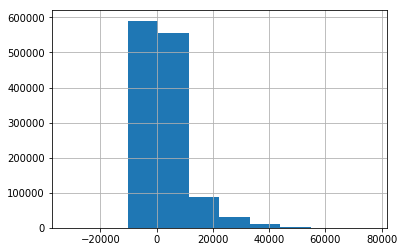

In [51]:
(df_complete['expected_return']-df_complete['total_pymnt']).hist()

Expected Total Payment based on loan amount, length and interest rate formula - a more direct measure from an investor standpoint

<img src = 'loanfm3.png'>


In [52]:
r=df_complete['int_rate']/(12*100)
n=df_complete['term']
p=df_complete['loan_amnt']


In [53]:
df_complete['expected_total_pymnt']=(r*p*n)/(1-((1+r)**(-n)))

In [54]:
df_complete[['loan_amnt','expected_total_pymnt','expected_return']]

,loan_amnt,expected_total_pymnt,expected_return
186,4500,5327.486145,5327.64
269,20000,30452.532371,30453.00
271,6600,7813.646346,7813.80
296,2500,3056.788375,3057.12
369,4000,5203.778089,5203.80
379,2700,3054.421565,3054.60
402,1000,1401.066417,1401.12
412,15000,16812.242112,16812.36
445,8000,8966.529127,8966.88
510,5000,5604.080704,5604.12


In [55]:
df_complete.loc[df_complete['expected_total_pymnt']-df_complete['total_pymnt']<0][['loan_amnt','term','int_rate','installment','last_pymnt_amnt','total_pymnt','total_pymnt_inv','expected_total_pymnt','expected_return','total_rec_late_fee']]

,loan_amnt,term,int_rate,installment,last_pymnt_amnt,total_pymnt,total_pymnt_inv,expected_total_pymnt,expected_return,total_rec_late_fee
501181,6000,36,6.00,186.91,2029.03,6866.966397,6866.97,6571.138490,6728.76,0.00
513265,10000,36,6.00,308.81,4765.34,11241.998480,11242.00,10951.897483,11117.16,0.00
517391,2800,36,8.99,89.03,832.53,3216.176675,3216.18,3204.943937,3205.08,0.00
520332,12000,36,13.99,410.08,3583.03,14807.443121,14807.44,14762.637958,14762.88,143.50
522024,19200,36,11.49,633.05,6155.12,22802.225021,22802.23,22789.728486,22789.80,126.60
523703,20000,36,13.49,678.61,7772.20,24540.801512,24540.80,24429.924539,24429.96,0.00
524166,2000,36,10.99,65.47,654.59,2415.588988,2415.59,2356.846681,2356.92,75.00
526766,12000,36,8.99,381.55,4845.63,13803.087401,13803.09,13735.474014,13735.80,0.00
526884,8400,36,13.49,285.02,3120.67,10269.869324,10269.87,10260.568306,10260.72,45.00
528507,10800,36,12.79,362.81,3817.71,13117.137040,13117.14,13060.916378,13061.16,0.00


Some discrepancies between the two calculation methods - possibly due to changing installment amount after borrowers make larger than expected repayments?

In [56]:
(df_complete['expected_total_pymnt']-df_complete['total_pymnt']).describe()

count    1.280370e+06
mean     3.833869e+03
std      7.080753e+03
min     -1.062474e+04
25%      9.663064e+01
50%      8.146332e+02
75%      3.998984e+03
max      7.640615e+04
dtype: float64

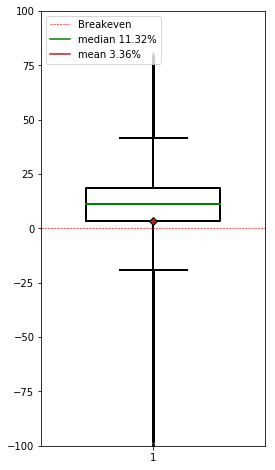

In [57]:
plt.figure(figsize=(4,8))
plt.boxplot(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt']))*100,
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,),
            capprops=dict(linewidth=2,),
            widths=0.6
           )
plt.axhline(0,color='red',linewidth=0.6,label='Breakeven',linestyle='--')
plt.axhline(101,color='g',label='median '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()*100,2))+'%')
plt.axhline(101,color='firebrick',label='mean '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).mean()*100,2))+'%')
plt.ylim([-100,100])
plt.legend(loc='upper left')
plt.show()

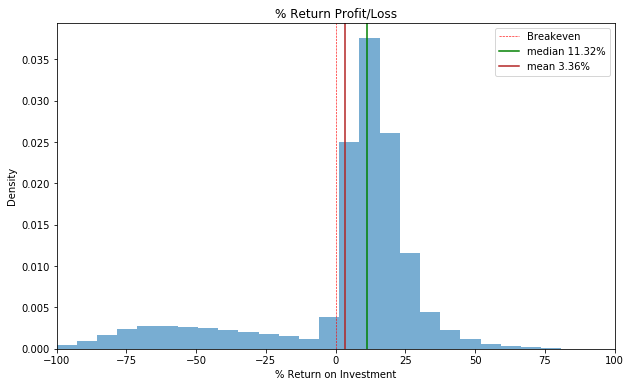

In [99]:
plt.figure(figsize=(10,6))
plt.hist(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt']))*100,alpha=0.6,bins=30,density=True)
plt.axvline(0,color='red',linewidth=0.6,label='Breakeven',linestyle='--')
plt.axvline(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()*100,color='g',label='median '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()*100,2))+'%')
plt.axvline(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).mean()*100,color='firebrick',label='mean '+str(round(((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).mean()*100,2))+'%')
plt.xlim([-100,100])
plt.legend()
plt.xlabel('% Return on Investment')
plt.ylabel('Density')
plt.title('% Return Profit/Loss')
plt.show()

In [59]:
((df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['loan_amnt'])).median()

0.1132440817327722

In [60]:
df_complete.groupby('grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,223254.0,7.125279,0.998421,5.31,6.49,7.26,7.89,9.63
B,374464.0,10.689944,1.356377,6.00,9.71,10.91,11.53,14.09
C,362409.0,14.015066,1.229691,6.00,12.99,13.99,14.99,17.27
D,191021.0,17.673970,1.493273,6.00,16.55,17.57,18.55,22.35
E,89734.0,21.038736,2.300536,6.00,19.19,20.75,22.40,27.27
F,30838.0,24.818224,2.503629,6.00,23.28,24.11,25.69,30.75
G,8650.0,27.588175,2.524913,6.00,25.83,27.31,30.79,30.99


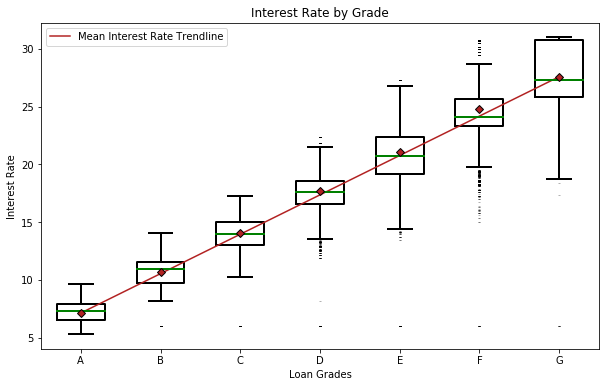

In [95]:
plt.figure(figsize=(10,6))
plt.boxplot([df_complete.loc[df_complete['grade']=='A']['int_rate'],
             df_complete.loc[df_complete['grade']=='B']['int_rate'],
             df_complete.loc[df_complete['grade']=='C']['int_rate'],
             df_complete.loc[df_complete['grade']=='D']['int_rate'],
             df_complete.loc[df_complete['grade']=='E']['int_rate'],
             df_complete.loc[df_complete['grade']=='F']['int_rate'],
             df_complete.loc[df_complete['grade']=='G']['int_rate']],
             showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,),
            capprops=dict(linewidth=2,),
            widths=0.6)

plt.plot([1,7],[df_complete.loc[df_complete['grade']=='A']['int_rate'].mean(),df_complete.loc[df_complete['grade']=='G']['int_rate'].mean()],label='Mean Interest Rate Trendline',color='firebrick')
plt.xticks([1,2,3,4,5,6,7],['A', 'B', 'C', 'D', 'E', 'F', 'G'])
plt.title('Interest Rate by Grade')
plt.xlabel('Loan Grades')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()    

<BarContainer object of 7 artists>

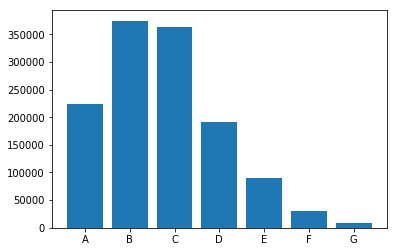

In [62]:
plt.bar(df_complete['grade'].value_counts().sort_index().index,df_complete['grade'].value_counts().sort_index().values)

In [63]:
sorted(df_complete['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [67]:
# fig1=go.Figure()
# for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
#     fig1.add_trace(go.Box(y=(df_complete.loc[df_complete['grade']==i]['total_pymnt']-df_complete.loc[df_complete['grade']==i]['loan_amnt'])/df_complete.loc[df_complete['grade']==i]['loan_amnt'],
#                          name= 'Grade '+i,
#                          boxpoints='suspectedoutliers',
#                          marker=dict(opacity=0.05,size=0.5),
#                          boxmean=True))
# fig1.update_layout(title='% Return Profit/Loss by Grade',
#                    title_x=0.5,xaxis_title='Loan Grade',
#                    yaxis=dict(title='Return % of loan',showgrid=True))
# fig1.show()

In [68]:
df_complete36=df_complete.loc[df_complete['term']==36]
df_complete60=df_complete.loc[df_complete['term']==60]

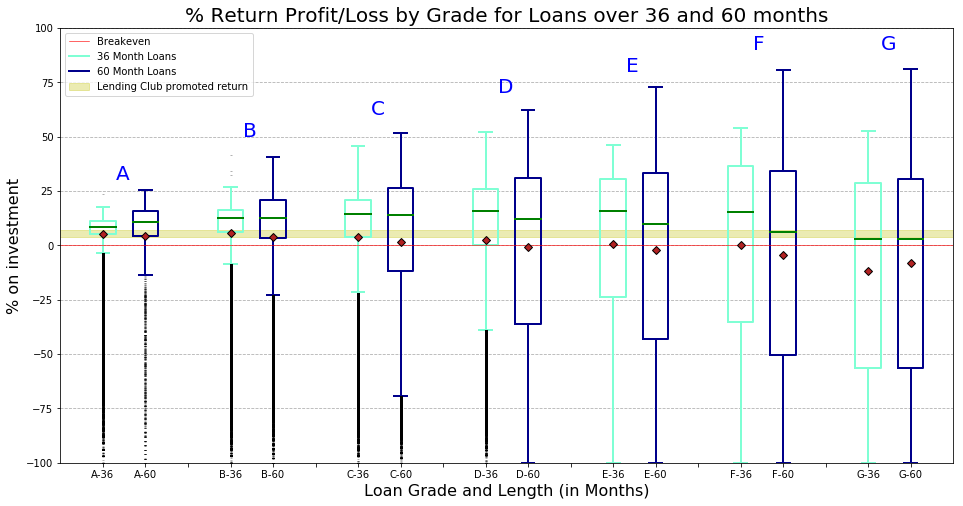

In [69]:
#actual loss or profit by grade as a % of loan amount for 36 month loans
plt.figure(figsize=(16,8))
plt.boxplot([(df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='C']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='D']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='E']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='F']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'],
            (df_complete36.loc[df_complete36['grade']=='G']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='G']['loan_amnt']],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='aquamarine'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='aquamarine'),
            capprops=dict(linewidth=2,color='aquamarine'),
            positions=[1,4,7,10,13,16,19],
            widths=0.6,
           )

plt.boxplot([(df_complete60.loc[df_complete60['grade']=='A']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='B']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='C']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='D']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='E']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='F']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'],
            (df_complete60.loc[df_complete60['grade']=='G']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])*100/df_complete60.loc[df_complete60['grade']=='G']['loan_amnt']],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='darkblue'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='darkblue'),
            capprops=dict(linewidth=2,color='darkblue'),
            positions=[2,5,8,11,14,17,20],
            widths=0.6,
           )
plt.xticks(np.arange(1,21),['A-36','A-60','', 'B-36','B-60','', 'C-36','C-60','', 'D-36','D-60','', 'E-36','E-60','', 'F-36','F-60','', 'G-36','G-60',''])
plt.axhline(0,color='red',linewidth=0.6,label='Breakeven')
plt.title('% Return Profit/Loss by Grade for Loans over 36 and 60 months',size=20)
plt.ylim([-100,100])
plt.ylabel('% on investment',size='16')
plt.xlabel('Loan Grade and Length (in Months)',size=16)
plt.axhline(101,color='aquamarine',linewidth=2,label='36 Month Loans') #off chart for legend only
plt.axhline(101,color='darkblue',linewidth=2,label='60 Month Loans') #off chart for legend only
plt.fill_between([-1,22], 4, y2=7,color='y',label='Lending Club promoted return',alpha=0.3)
plt.xlim([0,21])
# plt.axhline(4,color='y',linewidth=0.6,label='Lending Club promoted return')
# plt.axhline(7,color='y',linewidth=0.6)
plt.legend(loc ='upper left')
plt.text(1.3,30,'A',fontdict=dict(size=20,color='blue'))
plt.text(4.3,50,'B',fontdict=dict(size=20,color='blue'))
plt.text(7.3,60,'C',fontdict=dict(size=20,color='blue'))
plt.text(10.3,70,'D',fontdict=dict(size=20,color='blue'))
plt.text(13.3,80,'E',fontdict=dict(size=20,color='blue'))
plt.text(16.3,90,'F',fontdict=dict(size=20,color='blue'))
plt.text(19.3,90,'G',fontdict=dict(size=20,color='blue'))
plt.grid(which='major',axis='y',linestyle='--')
plt.show()

In [70]:
((df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='A']['loan_amnt']).mean()

5.295169509611857

In [71]:
((df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/df_complete36.loc[df_complete36['grade']=='B']['loan_amnt']).mean()

5.5794378420830375

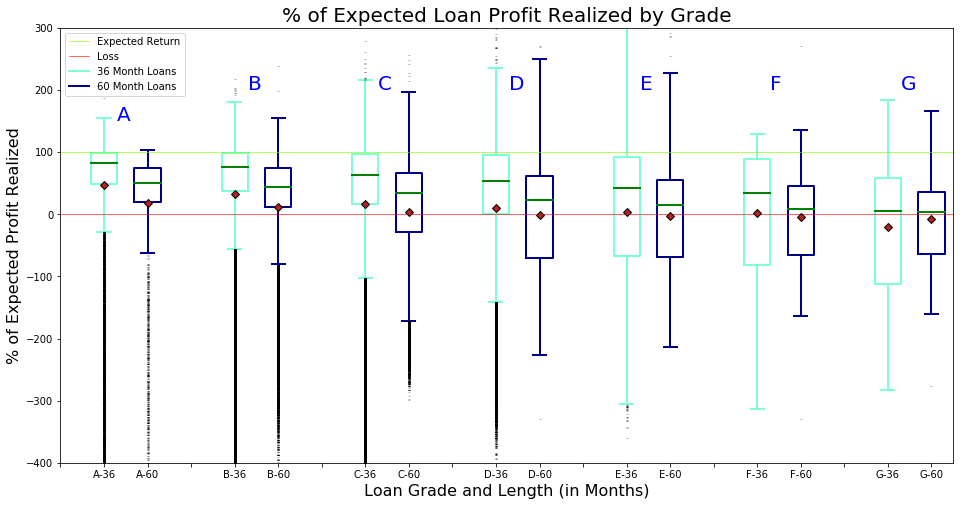

In [101]:
#Difference between actual and epxected payment for 36 and 60 month loans by grade-ALL
plt.figure(figsize=(16,8))
plt.boxplot([(df_complete36.loc[df_complete36['grade']=='A']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='A']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='A']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='B']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='B']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='B']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='C']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='C']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='C']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='D']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='D']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='D']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='E']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='E']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='E']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='F']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='F']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='F']['loan_amnt']),
            (df_complete36.loc[df_complete36['grade']=='G']['total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])*100/(df_complete36.loc[df_complete36['grade']=='G']['expected_total_pymnt']-df_complete36.loc[df_complete36['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='aquamarine'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='aquamarine'),
            capprops=dict(linewidth=2,color='aquamarine'),
            positions=[1,4,7,10,13,16,19],
            widths=0.6,
           )

plt.boxplot([(df_complete60.loc[df_complete60['grade']=='A']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='A']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='A']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='B']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='B']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='B']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='C']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='C']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='C']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='D']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='D']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='D']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='E']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='E']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='E']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='F']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='F']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='F']['loan_amnt']),
            (df_complete60.loc[df_complete60['grade']=='G']['total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])*100/(df_complete60.loc[df_complete60['grade']=='G']['expected_total_pymnt']-df_complete60.loc[df_complete60['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='darkblue'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='darkblue'),
            capprops=dict(linewidth=2,color='darkblue'),
            positions=[2,5,8,11,14,17,20],
            widths=0.6,
           )
plt.xticks(np.arange(0,21),["",'A-36','A-60','', 'B-36','B-60','', 'C-36','C-60','', 'D-36','D-60','', 'E-36','E-60','', 'F-36','F-60','', 'G-36','G-60',''])
plt.axhline(100,color='chartreuse',linewidth=0.6,label='Expected Return')
plt.axhline(0,color='red',linewidth=0.6,label='Loss')
plt.axhline(301,color='aquamarine',linewidth=2,label='36 Month Loans') #off chart for legend only
plt.axhline(301,color='darkblue',linewidth=2,label='60 Month Loans') #off chart for legend only
plt.legend(loc ='upper left')
plt.title('% of Expected Loan Profit Realized by Grade',size=20)
plt.xlabel('Loan Grade and Length (in Months)',size=16)
plt.ylabel('% of Expected Profit Realized',size=16)
plt.ylim([-400,300])
plt.text(1.3,150,'A',fontdict=dict(size=20,color='blue'))
plt.text(4.3,200,'B',fontdict=dict(size=20,color='blue'))
plt.text(7.3,200,'C',fontdict=dict(size=20,color='blue'))
plt.text(10.3,200,'D',fontdict=dict(size=20,color='blue'))
plt.text(13.3,200,'E',fontdict=dict(size=20,color='blue'))
plt.text(16.3,200,'F',fontdict=dict(size=20,color='blue'))
plt.text(19.3,200,'G',fontdict=dict(size=20,color='blue'))
plt.show()

In [73]:
#fully paid loans only
df_complete36fp=df_complete36.loc[df['loan_status']=='Fully Paid']
df_complete60fp=df_complete60.loc[df['loan_status']=='Fully Paid']

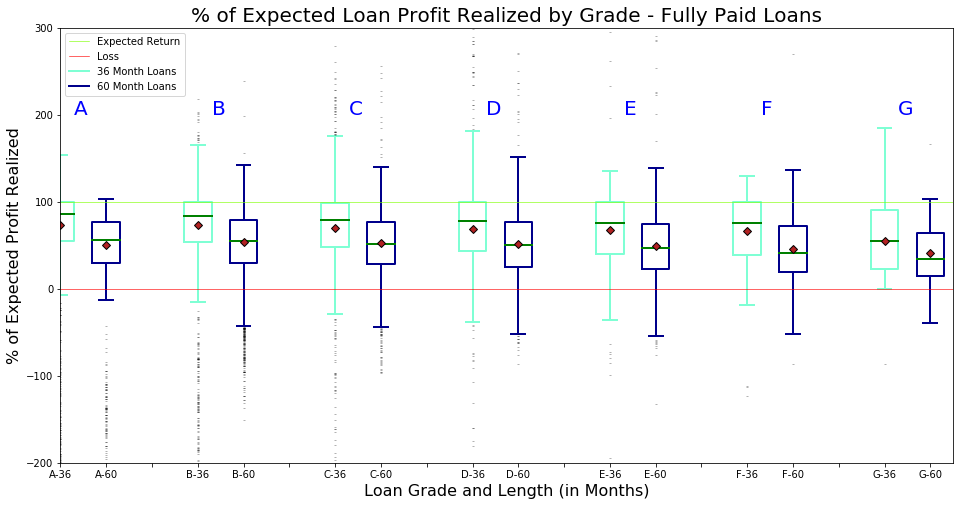

In [74]:
#Difference between actual and epxected payment for 36 and 60 month loans by grade - fully paid only

#(df_complete['total_pymnt']-df_complete['loan_amnt'])/(df_complete['expected_total_pymnt']-df_complete['loan_amnt'])
plt.figure(figsize=(16,8))
plt.boxplot([(df_complete36fp.loc[df_complete36fp['grade']=='A']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='A']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='A']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='A']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='B']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='B']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='B']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='B']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='C']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='C']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='C']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='C']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='D']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='D']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='D']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='D']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='E']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='E']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='E']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='E']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='F']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='F']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='F']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='F']['loan_amnt']),
            (df_complete36fp.loc[df_complete36fp['grade']=='G']['total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='G']['loan_amnt'])*100/(df_complete36fp.loc[df_complete36fp['grade']=='G']['expected_total_pymnt']-df_complete36fp.loc[df_complete36fp['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='aquamarine'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='aquamarine'),
            capprops=dict(linewidth=2,color='aquamarine'),
            positions=[1,4,7,10,13,16,19],
            widths=0.6,
           )

plt.boxplot([(df_complete60fp.loc[df_complete60fp['grade']=='A']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='A']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='A']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='A']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='B']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='B']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='B']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='B']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='C']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='C']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='C']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='C']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='D']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='D']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='D']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='D']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='E']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='E']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='E']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='E']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='F']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='F']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='F']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='F']['loan_amnt']),
            (df_complete60fp.loc[df_complete60fp['grade']=='G']['total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='G']['loan_amnt'])*100/(df_complete60fp.loc[df_complete60fp['grade']=='G']['expected_total_pymnt']-df_complete60fp.loc[df_complete60fp['grade']=='G']['loan_amnt'])],
            showmeans=True, meanprops=dict(marker='D', markeredgecolor='black',markerfacecolor='firebrick'),
            flierprops=dict(markersize=2,marker='_',alpha=0.3),
            boxprops=dict(linewidth=2,color='darkblue'),
            medianprops=dict(linewidth=2,color='g'),
            whiskerprops=dict(linewidth=2,color='darkblue'),
            capprops=dict(linewidth=2,color='darkblue'),
            positions=[2,5,8,11,14,17,20],
            widths=0.6,
           )
plt.xticks(np.arange(1,21),['A-36','A-60','', 'B-36','B-60','', 'C-36','C-60','', 'D-36','D-60','', 'E-36','E-60','', 'F-36','F-60','', 'G-36','G-60',''])
plt.axhline(100,color='chartreuse',linewidth=0.6,label='Expected Return')
plt.axhline(0,color='red',linewidth=0.6,label='Loss')
plt.legend(loc ='upper left')
plt.ylabel('% of Expected Profit Realized',size=16)
plt.title('% of Expected Loan Profit Realized by Grade - Fully Paid Loans',size = 20)
plt.xlabel('Loan Grade and Length (in Months)',size=16)
plt.ylim([-200,300])
plt.axhline(301,color='aquamarine',linewidth=2,label='36 Month Loans') #off chart for legend only
plt.axhline(301,color='darkblue',linewidth=2,label='60 Month Loans') #off chart for legend only
plt.legend(loc ='upper left')
plt.text(1.3,200,'A',fontdict=dict(size=20,color='blue'))
plt.text(4.3,200,'B',fontdict=dict(size=20,color='blue'))
plt.text(7.3,200,'C',fontdict=dict(size=20,color='blue'))
plt.text(10.3,200,'D',fontdict=dict(size=20,color='blue'))
plt.text(13.3,200,'E',fontdict=dict(size=20,color='blue'))
plt.text(16.3,200,'F',fontdict=dict(size=20,color='blue'))
plt.text(19.3,200,'G',fontdict=dict(size=20,color='blue'))
plt.show()

Simulations - take 1000 loans from 2014(should be settled by now) with graded A or B and term 36 months and find return on loan % - sum/100 (1 dollar in each loan)

In [104]:
df.loc[(df['issue_d']>'2013')&(df['issue_d']<'2014')]['loan_status'].value_counts()

Fully Paid            107949
Charged Off            19972
Current                    9
Late (31-120 days)         8
Late (16-30 days)          2
In Grace Period            2
Name: loan_status, dtype: int64

In [181]:
df_complete36fp.loc[(df_complete36fp['grade']=="A")&(df_complete36fp['total_pymnt']-df_complete36fp['loan_amnt']<0)][['loan_amnt','term','int_rate','installment','last_pymnt_amnt','last_pymnt_d','total_pymnt','total_pymnt_inv','expected_total_pymnt','expected_return','total_rec_prncp','loan_status','hardship_length','debt_settlement_flag']]

,loan_amnt,term,int_rate,installment,last_pymnt_amnt,last_pymnt_d,total_pymnt,total_pymnt_inv,expected_total_pymnt,expected_return,total_rec_prncp,loan_status,hardship_length,debt_settlement_flag
1845155,30225,36,6.62,638.64,6249.05,2014-10-01,22835.499417,22808.05,33408.643388,22991.04,20800.00,Fully Paid,NaN,N
1845166,14400,36,6.62,358.47,3264.95,2014-08-01,12737.809330,12737.81,15916.773029,12904.92,11675.00,Fully Paid,NaN,N
1845187,13950,36,8.90,375.49,384.97,2015-07-01,13517.309998,13517.31,15946.462975,13517.64,11825.00,Fully Paid,NaN,N
1845190,22500,36,8.90,445.34,3476.10,2014-12-01,15941.730929,15941.73,25720.101573,16032.24,14025.00,Fully Paid,NaN,N
1845215,26500,36,8.90,571.56,576.62,2015-07-01,20576.080003,20576.08,30292.564075,20576.16,18000.00,Fully Paid,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138293,7500,36,8.00,175.49,5217.49,2008-09-01,5743.789304,0.00,8460.818675,6317.64,5600.00,Fully Paid,NaN,N
2138298,7000,36,8.63,163.68,164.40,2011-04-01,5892.226539,110.80,7970.208070,5892.48,5175.00,Fully Paid,NaN,N
2138299,7500,36,8.00,112.82,115.15,2011-05-01,4062.635762,110.11,8460.818675,4061.52,3600.00,Fully Paid,NaN,N
2138313,10000,36,8.32,134.60,17.71,2011-07-01,4877.452940,1086.96,11334.311123,4845.60,4275.00,Fully Paid,NaN,N


In [ ]:
df_complete['exp']

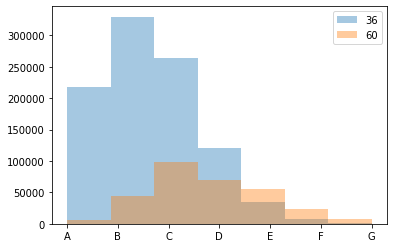

In [120]:
plt.hist(sorted(df_complete36['grade']),bins=7,alpha=0.4,label='36')
plt.hist(sorted(df_complete60['grade']),bins=7,alpha=0.4,label='60')
plt.legend()

In [107]:
df_complete60['grade'].value_counts(normalize=True)

C    0.322561
D    0.230454
E    0.180746
B    0.145751
F    0.077702
G    0.023608
A    0.019178
Name: grade, dtype: float64

Explore most common self reported employment titles 

In [46]:
df['emp_title'].str.lower().str.strip().value_counts().head(50)

manager                     43703
teacher                     43697
owner                       31935
registered nurse            22145
driver                      21085
supervisor                  21039
sales                       18137
rn                          16353
project manager             13211
office manager              13197
general manager             12760
truck driver                12012
director                    10218
president                    9531
engineer                     8623
sales manager                8226
operations manager           7840
vice president               7437
police officer               7298
technician                   7020
store manager                6935
nurse                        6807
administrative assistant     6666
accountant                   6561
attorney                     6197
mechanic                     6104
account manager              5977
assistant manager            5686
server                       5490
executive assi

In [47]:
df['emp_title']=df['emp_title'].str.lower().str.strip()

In [48]:
df.loc[df['emp_title'].str.contains('driver')==True]['emp_title'].unique()

array(['driver coordinator', 'fuel truck driver', 'driver', ...,
       'chef driver', 'aasitant-driver', 'driver and machine operator'],
      dtype=object)

In [49]:
df.loc[df['emp_title'].str.contains('nurse')==True]['emp_title'].unique()

array(['neonatal nurse practitioner', 'nurse technician',
       'registered nurse', ..., 'supervisor/woundcare nurse',
       'live nursery specialist/garden manager',
       'nurse manager - emergency department'], dtype=object)

In [50]:
df['emp_title']=df['emp_title'].replace(['registered nurse','rn','truck driver'],['nurse','nurse','driver'])
#too many drivers and nurses to actually do this for all. these are in top 50 jobs

In [51]:
df_nurse=df.loc[df['emp_title']=='nurse']
df_driver=df.loc[df['emp_title']=='driver']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

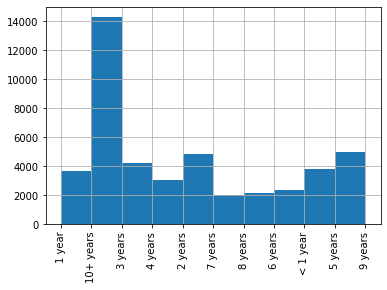

In [52]:
df_nurse['emp_length'].hist()
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

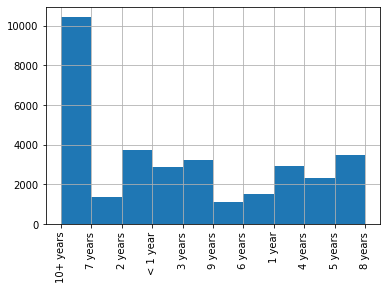

In [53]:
df_driver['emp_length'].hist()
plt.xticks(rotation=90)

C:\kosta\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



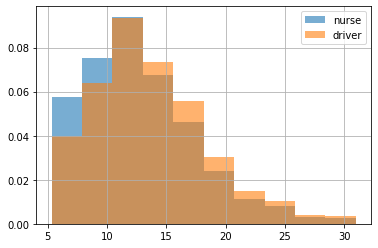

In [54]:
df_nurse['int_rate'].hist(alpha=0.6, label='nurse',normed=True)
df_driver['int_rate'].hist(alpha=0.6, label='driver',normed=True)
plt.legend()

In [55]:
print(df_nurse['annual_inc'].describe())
print(df_driver['annual_inc'].describe())

count    4.530500e+04
mean     8.382018e+04
std      7.672671e+04
min      1.090000e+04
25%      6.200000e+04
50%      7.700000e+04
75%      9.800000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64
count    3.309700e+04
mean     6.696490e+04
std      7.506120e+04
min      2.500000e+03
25%      5.000000e+04
50%      6.184400e+04
75%      7.900000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64


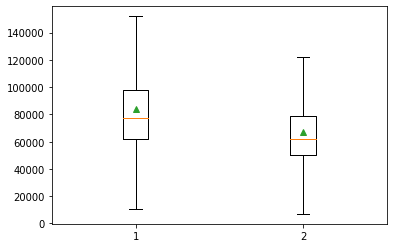

In [56]:
plt.boxplot([df_nurse['annual_inc'],df_driver['annual_inc']],showmeans=True, showfliers=False)
plt.show()

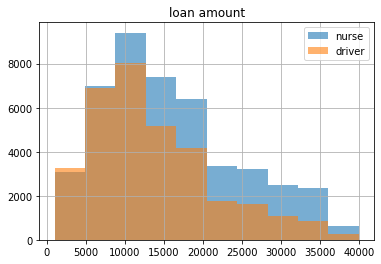

In [57]:
df_nurse['loan_amnt'].hist(alpha=0.6, label='nurse')
df_driver['loan_amnt'].hist(alpha=.6,label='driver')
plt.title('loan amount')
plt.legend()

In [58]:
df_nurse['term'].value_counts()

 36 months    32707
 60 months    12598
Name: term, dtype: int64

In [59]:
df_driver['term'].value_counts()

 36 months    24173
 60 months     8924
Name: term, dtype: int64

In [60]:
df_nurse10=df_nurse.loc[df['emp_length']=='10+ years']
df_driver10=df_driver.loc[df['emp_length']=='10+ years']

In [61]:
print(df_nurse10['annual_inc'].describe())
print(df_driver10['annual_inc'].describe())

count    1.429700e+04
mean     9.356768e+04
std      8.369992e+04
min      1.900000e+04
25%      7.000000e+04
50%      8.700000e+04
75%      1.090000e+05
max      9.000000e+06
Name: annual_inc, dtype: float64
count    1.043400e+04
mean     7.446567e+04
std      3.813308e+04
min      1.400000e+04
25%      5.500000e+04
50%      7.000000e+04
75%      8.868750e+04
max      1.644000e+06
Name: annual_inc, dtype: float64


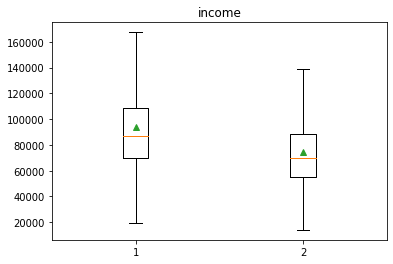

In [62]:
plt.boxplot([df_nurse10['annual_inc'],df_driver10['annual_inc']],showmeans=True, showfliers=False)
plt.title('income')
plt.show()

In [63]:
df_nurse10.loc[df['annual_inc']==9000000].dropna(axis=1).transpose().head(50)
#must be a mistake on the income - 9mil!

,970097
loan_amnt,11000
term,36 months
int_rate,6.89
installment,339.1
grade,A
sub_grade,A3
emp_title,nurse
emp_length,10+ years
home_ownership,MORTGAGE
annual_inc,9e+06


In [64]:
df.verification_status.value_counts()

Source Verified    851935
Not Verified       700202
Verified           587821
Name: verification_status, dtype: int64

In [28]:
df_hardship=df.loc[df['hardship_length'].isna()==False]

In [29]:
df_hardship['loan_status'].value_counts()

Charged Off           3701
Current               2849
Late (31-120 days)    1507
Fully Paid            1483
In Grace Period        357
Late (16-30 days)      190
Name: loan_status, dtype: int64

In [30]:
df_hardship['hardship_status'].value_counts()

COMPLETED    7225
BROKEN       2088
ACTIVE        774
Name: hardship_status, dtype: int64

In [31]:
df_hardship.loc[df['loan_status']=='Charged Off']['hardship_status'].value_counts()

COMPLETED    1963
BROKEN       1737
ACTIVE          1
Name: hardship_status, dtype: int64

In [ ]:
df_hardship.loc[df['loan_status']=='Fully Paid']['hardship_status'].value_counts()

In [43]:
df['hardship_amount'].notna().sum()/len(df)

0.004713643912637538